# Contenido:
1. Rutina para presentar matrices con fraccionarios
2. Sistema Homogéneo
3. Espacio Nulo
3. Matriz por vector
4. Espacio Columna
4. Subespacios de $\mathbb{R}^n$ (primera aproximación)

# Rutina para presentar matrices con fraccionarios

La siguiente rutina permite presentar matrices de numpy con fraccionarios.

In [1]:
def udprint(a,espacio=', '): #a es una matriz de numpy
    m,n=a.shape
    m=range(m)
    n=range(n)
    listas=[]
    maximos=[0 for i in n]
    for i in m:
        lista=[]
        for j in n:
            texto=str(a[i,j])
            lista.append(texto)
            maximos[j]=max(maximos[j],len(texto))
        listas.append(lista)
    salida='['
    for i in m:
        salida+='['+('{:^'+str(maximos[0])+'}').format(listas[i][0]) # se usa format para centrar el texto
        for j in n[1:]:
            salida+=  espacio + ('{:^'+str(maximos[j])+'}').format(listas[i][j])  # se usa format para centrar el texto
        salida+='],\n '
    salida=salida[:-1]+'] '
    print(salida)  

In [2]:
import numpy as np
from fractions import Fraction 

A=np.matrix([
    [Fraction(11, 232), Fraction(9, 116), 0, Fraction(25, 232), 0],
    [Fraction(-221, 232), 1, Fraction(-107, 116), Fraction(25, 232), 0],
    [Fraction(157, 2320), Fraction(23, 1160), 0, Fraction(167, 2320), 1]
])


A # Presentación usual de matriz de numpy con fraccionarios

matrix([[Fraction(11, 232), Fraction(9, 116), 0, Fraction(25, 232), 0],
        [Fraction(-221, 232), 1, Fraction(-107, 116), Fraction(25, 232),
         0],
        [Fraction(157, 2320), Fraction(23, 1160), 0, Fraction(167, 2320),
         1]], dtype=object)

In [3]:
udprint(A) # Presentación de udprint

[[ 11/232 ,  9/116 ,    0    ,  25/232 , 0],
 [-221/232,    1   , -107/116,  25/232 , 0],
 [157/2320, 23/1160,    0    , 167/2320, 1],
] 


# Sistema Homogéneo

## Definición

Un **sistema homogéneo (SH)** es un sistema de ecuaciones lineales donde sus términos constantes son cero. 

$[A:\vec{0}]$

Todo sistema de ecuaciones lineales $[A:\vec{b}]$ tiene un **sistema homogéneo asociado** dado por $[A:\vec{0}]$


## Ejemplo 1

Para la siguiente matriz <u>extendida</u> encuentre el sistema de ecuaciones homogéneo asociado y la matriz extendida asociada homogénea.

In [4]:
matriz_ejemplo=np.matrix([ 
    [11, 2, 13,  3, 0, 1],
    [4,  15, 19, 6, 1, 2],
    [7,  8, 15, 19, 1, 3]
])

## Solución 
El sistema de ecuaciones de la matriz anterior es el siguiente.

$\begin{align}
11x_0 + 2x_1 + 13x_2 +  3x_3 + 0x_4 &= 1\\
4x_0 +  15x_1 + 19x_2 + 6x_3 + 1x_4 &= 2\\
7x_0 +  8x_1 + 15x_2 + 19x_3 + 1x_4 &= 3
\end{align}$

Y por lo tanto, el siguiente es el sistema homogéneno asociado, ya que tiene los mismos coficientes y sus términos constantes son ceros. 

$\begin{align}
11x_0 + 2x_1 + 13x_2 +  3x_3 + 0x_4 &= 0\\
4x_0 +  15x_1 + 19x_2 + 6x_3 + 1x_4 &= 0\\
7x_0 +  8x_1 + 15x_2 + 19x_3 + 1x_4 &= 0
\end{align}$

Entonces la matriz extendida homogénea será 

In [5]:
matriz_ejemplo_homogenea=np.matrix([ 
    [11, 2, 13,  3, 0, 0],
    [4,  15, 19, 6, 1, 0],
    [7,  8, 15, 19, 1, 0]
])

## Ejemplo 2
Con respecto a la matriz extendida homogénea obtenida en el ejercicio anterior, hallar:
* la solución general, 
* la solución particular trivial,
* las soluciones particulares básicas que haya. 

## Solución
Se comienza realizando la eliminación de Gauss - Jordan.


In [6]:
import copy
A=copy.deepcopy(matriz_ejemplo_homogenea)
A

matrix([[11,  2, 13,  3,  0,  0],
        [ 4, 15, 19,  6,  1,  0],
        [ 7,  8, 15, 19,  1,  0]])

In [7]:
A[[0,1],:] = A[[1,0],:]
A

matrix([[ 4, 15, 19,  6,  1,  0],
        [11,  2, 13,  3,  0,  0],
        [ 7,  8, 15, 19,  1,  0]])

In [8]:
A[1,:] = 11*A[0,:] - 4*A[1,:]
A

matrix([[  4,  15,  19,   6,   1,   0],
        [  0, 157, 157,  54,  11,   0],
        [  7,   8,  15,  19,   1,   0]])

In [9]:
A[2,:] = 7*A[0,:] - 4*A[2,:]
A

matrix([[  4,  15,  19,   6,   1,   0],
        [  0, 157, 157,  54,  11,   0],
        [  0,  73,  73, -34,   3,   0]])

In [10]:
A[[2,1],:] = A[[1,2],:]
A

matrix([[  4,  15,  19,   6,   1,   0],
        [  0,  73,  73, -34,   3,   0],
        [  0, 157, 157,  54,  11,   0]])

In [11]:
A[2,:] = 157*A[1,:] - 73*A[2,:]
A

matrix([[    4,    15,    19,     6,     1,     0],
        [    0,    73,    73,   -34,     3,     0],
        [    0,     0,     0, -9280,  -332,     0]])

In [12]:
A[0,:] = 15*A[1,:] - 73*A[0,:]
A

matrix([[ -292,     0,  -292,  -948,   -28,     0],
        [    0,    73,    73,   -34,     3,     0],
        [    0,     0,     0, -9280,  -332,     0]])

In [13]:
A[1,:] = 34*A[2,:] - 9280*A[1,:]
A

matrix([[   -292,       0,    -292,    -948,     -28,       0],
        [      0, -677440, -677440,       0,  -39128,       0],
        [      0,       0,       0,   -9280,    -332,       0]])

In [14]:
A[0,:] = 948*A[2,:] - 9280*A[0,:]
A

matrix([[2709760,       0, 2709760,       0,  -54896,       0],
        [      0, -677440, -677440,       0,  -39128,       0],
        [      0,       0,       0,   -9280,    -332,       0]])

El sistema de ecuaciones de la matriz anterior es el siguiente.

$\begin{align}
2709760x_0 + 0x_1 + 2709760x_2 +  0x_3 - 54896x_4 &= 0\\
0x_0 -  677440x_1 - 677440x_2 + 0x_3 - 39128x_4 &= 0\\
0x_0 +  0x_1 - 9280x_2 + 0x_3 - 332x_4 &= 0
\end{align}$

Debido a que no puede haber pivotes en los términos contantes de un sistema homogeneo, ya que estos son cero. Entonces el sistema es <u>consistente</u>.

Como hay variables libres, el sistema tiene <u>infinitas soluciones</u>. 

Ahora asignamos parámetros a las variables libres.

$x_2=t_0$, $x_4=t_1$. 

Ahora se despejan las variables delanteras.

$\begin{align}
2709760x_0 &=0 - 0x_1 - 2709760t_0 -  0x_3 + 54896t_1 \\
 -  677440x_1 &=0 + 677440t_0 - 0x_3 + 39128t_1 \\
 -9280x_2 &=0 - 0x_3 + 332t_1 
\end{align}$

$\begin{align}
x_0 &=0 - 0x_1 - \frac{2709760}{2709760}t_0 -  0x_3 + \frac{54896}{2709760}t_1 \\
 x_1 &=0  + \frac{677440}{-  677440}t_0 - 0x_3 + \frac{39128}{-  677440}t_1 \\
 x_2 &=0 -0x_3 + \frac{332}{-9280}t_1 
\end{align}$

Finalmente, se escribe la solución general.

$\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right) =
\left( \matrix{0\\0\\0\\0\\0} \right) +
t_0\left( \matrix{-1\\-1\\1\\0\\0} \right) +
t_1\left( \matrix{\frac{47}{2320}\\ \frac{-67}{1160} \\ 0 \\ \frac{-83}{2320} \\1} \right)$

In [15]:
from fractions import Fraction as frac # Librería para el uso de fraccionarios
                                       # frac(numerador,denominador)

def solucion_general(t0,t1):
    x0 = 0 - t0 * frac(2709760,2709760)  + t1 * frac(54896,2709760)
    x1 = 0 + t0 * frac(677440 ,-  677440) +  t1 * frac(+39128,-677440) 
    x2 = t0
    x3 =  0  +  t1 * frac(332,-9280)
    x4 = t1
    return (x0,x1,x2,x3,x4)

In [16]:
(x0,x1,x2,x3,x4)=solucion_general(0,0)
print(x0,x1,x2,x3,x4) 

0 0 0 0 0


In [17]:
(x0,x1,x2,x3,x4)=solucion_general(1,0)
print(x0,x1,x2,x3,x4) 

-1 -1 1 0 0


In [18]:
(x0,x1,x2,x3,x4)=solucion_general(0,1)
print(x0,x1,x2,x3,x4) 

47/2320 -67/1160 0 -83/2320 1





## Teoremas
En todo sistema homogéneo se tiene que:
1. es consistente.

2. su solución particular trivial es $\vec{0}$.

3. sus soluciones particulares básicas corresponden a los vectores que multiplican los parámetros de cualquier sistema no homogéneo que esté asociado. 

## Pruebas

1. Si es homogéneo entonces:
 * sus términos constantes son cero
 * no tiene pivotes en los términos constantes
 * es consistente.
 
2. Los componentes de la solución particular trivial
 * son cero, en las variables libres, porque son iguales a un parámetro solamente.
 * son cero, en las variables delanteras, porque el término constante es cero.
 
3. Debido a que, al despejar los sistemas no homogéneo y homogéneo asociado, se usan las mismas operaciones elementales. Entonces las soluciones generales de los sistemas sólo se diferencian en la solución particular trivial.

## Definiciones
* El conjunto solución del sistema homogéneo $[A:\vec{0}]$, se llama el **espacio nulo** de la matriz $A$ y se denota $\text{Nu}(A)$.



* La **nulidad** de la matriz $A$ es:
  * <u>El número de columnas de $A$ sin pivotes</u>.
  * El número de variables libres.
  * El número de parámetros.
  * El número de soluciones particulares básicas. 


# Matriz por vector

## Notaciones

### Sistema de ecuaciones

$\matrix{
c_{11} x_1 + c_{12} x_2 + \ldots + c_{1n} x_n &= y_1 \\
c_{21} x_1 + c_{22} x_2 + \ldots + c_{2n} x_n &= y_2 \\
&\vdots\\
c_{m1} x_1 + c_{m2} x_2 + \ldots + c_{mn} x_n &= y_m \\
}$

### Combinación lineal


$x_1\left( \matrix{c_{11}\\c_{21}\\ \vdots \\c_{m1}} \right) 
+ x_2\left( \matrix{c_{12}\\c_{22}\\ \vdots \\c_{m2}} \right) 
+ \cdots
+ x_n\left( \matrix{c_{1n}\\c_{2n}\\ \vdots \\c_{mn}} \right) 
=\left( \matrix{y_1\\y_2\\ \vdots \\y_m} \right)$ 


### Matriz por vector

$\left[\matrix{
c_{11} & c_{12} & \cdots & c_{1n}  \\
c_{21} & c_{22} & \cdots & c_{2n} \\ 
\vdots &  \vdots &  \ddots & \vdots
\\
c_{m1} & c_{m2} & \cdots & c_{mn} }
\right]
\left( \matrix{x_1\\x_2\\ \vdots \\x_m} \right)
=\left( \matrix{y_1\\y_2\\ \vdots \\y_m} \right)$

Vectorialmente se puede escribir así.

$C \vec{x} = \vec{y}$

## Ejemplo 3

Calcule.
$\left[\matrix{
1 & 2 & 3  \\
4 & 5 & 6 }
\right]
\left( \matrix{7\\8\\ 9} \right)$

### Solución 1

$\left[\matrix{
1 & 2 & 3  \\
4 & 5 & 6 }
\right]
\left( \matrix{7\\8\\ 9} \right)
=\left( \matrix{7 \cdot 1 + 8  \cdot 2 + 9  \cdot 3\\ 
7 \cdot 4 + 8  \cdot 5 + 9  \cdot 6} \right)
=\left( \matrix{7+16+27\\28+40+54} \right)
=\left( \matrix{50\\122} \right)$

### Solución 2

$\begin{align}
\left[\matrix{
1 & 2 & 3  \\
4 & 5 & 6 }
\right]
\left( \matrix{7\\8\\ 9} \right)
&=7\left( \matrix{1\\4} \right)
+8\left( \matrix{2\\5} \right)
+9\left( \matrix{3\\6} \right)\\
&=\left( \matrix{7 \cdot 1\\7 \cdot 4} \right)
+\left( \matrix{8 \cdot 2\\8 \cdot 5} \right)
+\left( \matrix{9 \cdot 3\\9 \cdot 6} \right)\\
&=\left( \matrix{7+16+27\\28+40+54} \right)\\
&=\left( \matrix{50\\122} \right)
\end{align}$




In [19]:
A=np.matrix([[1,2,3],
             [4,5,6]])
A

matrix([[1, 2, 3],
        [4, 5, 6]])

In [20]:
x=np.matrix([[7],
             [8],
             [9]])
x

matrix([[7],
        [8],
        [9]])

In [21]:
# @ se usa para multiplicar matriz por vector

y = A@x
y

matrix([[ 50],
        [122]])

## Ejemplo 4
$ \left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]
\left( \matrix{t_0\\t_1} \right) =
t_0\left( \matrix{-1\\-1\\1\\0\\0} \right) +
t_1\left( \matrix{\frac{47}{2320}\\ \frac{-67}{1160} \\ 0 \\ \frac{-83}{2320} \\1} \right) $


## Espacio nulo de una matriz
Usando esta notación podemos volver a escribir la definición de **espacio nulo** de una matriz $A$.


$\text{Nu}(A)=\{\vec{x} \mid A\vec{x}=\vec{0} \}$

Recordemos que la **nulidad** de la matriz $A$ es:
  * <u>El número de columnas de $A$ sin pivotes</u>.
  * El número de variables libres del SH $[A:\vec{0}]$.
  * El número de parámetros del SH $[A:\vec{0}]$.
  * El número de soluciones particulares básicas del SH $[A:\vec{0}]$. 
  
La nulidad de $A$ se denota $\nu(A)$.


## Espacio columna de una matriz 

El **espacio columna** de una matriz $C$ está dado por

$\text{Co}(C)=\{ C\vec{t} \mid \vec{t} \in \mathbb{R}^n\}$

El **rango** de la matriz $C$ es:
* El número de pivotes de $C$
* El número de variables delanteras del SH $[C:\vec{0}]$

El rango de $C$ se denota $\rho(C)$.

## Ejemplo 5

En el ejemeplo 2 se planteó el siguiente sistema de ecuaciones.

$\begin{align}
11x_0 + 2x_1 + 13x_2 +  3x_3 + 0x_4 &= 0\\
4x_0 +  15x_1 + 19x_2 + 6x_3 + 1x_4 &= 0\\
7x_0 +  8x_1 + 15x_2 + 19x_3 + 1x_4 &= 0
\end{align}$

El cual se puede escribir como un matriz extendida

$\left[\matrix{
11 & 2 & 13 &  3 & 0 & : & 0\\
4 &  15 & 19 & 6 & 1 & : & 0\\
7 &  8 & 15 & 19 & 1 & : & 0}\right]$

o como una matriz por vector

$\left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]\left( \matrix{ x_0\\x_1\\x_2\\x_3\\x_4} \right)=\left( \matrix{0\\0\\0} \right)$

El conjunto de los vectores$\vec{x}=\left( \matrix{ x_0\\x_1\\x_2\\x_3\\x_4} \right)$ que cumplen la ecuacion $A \vec{x} = \vec{0}$ se llama el **espacio nulo** de $A$.




Por otro lado, recordemos que el conjunto solución corresponde

$
t_0\left( \matrix{-1\\-1\\1\\0\\0} \right) +
t_1\left( \matrix{\frac{47}{2320}\\ \frac{-67}{1160} \\ 0 \\ \frac{-83}{2320} \\1} \right) = \left( \matrix{ x_0\\x_1\\x_2\\x_3\\x_4} \right)$

el cual también se puede escribir como una matriz por un vector.


$ \left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]
\left( \matrix{t_0\\t_1} \right)=\left( \matrix{ x_0\\x_1\\x_2\\x_3\\x_4} \right) $

El conjunto de los vectores$\vec{x}=\left( \matrix{ x_0\\x_1\\x_2\\x_3\\x_4} \right)$ que pueden cumplir la ecuacion $A \vec{t} = \vec{x}$ se llama el **espacio columna** de $A$.

## En resumen
Si nos preguntan por el espacio nulo de $A=\left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]$.

Tenemos que encontrar todos los vectores $\vec{x}=\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)$ tales que 

$
\left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)=\left( \matrix{0\\0\\0} \right)
$

Estos vectores $\vec{x}=\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)$ se pueden encontrar con el espacio columna de $C=\left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]$

$
\left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]\left( \matrix{t_0\\t_1} \right)=\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)
$

Es decir que $C$ prácticamente nos permite despejar el vector $\vec{x}=\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)$

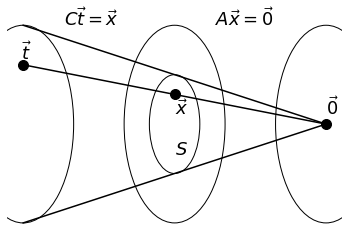

In [22]:
# Omitir este código
# Este código dibuja dos conjuntos anidados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

puntos=[[0  ,3  ,6],  # x1 x2 x3 x4
        [2.6,2.3,2]]  # y1 y2 y3 y4
ax.scatter(*puntos,s=100,color='k')

lineas=[(0,6),(1,2),'k', #(x1,x4),(y1,y4),color
        (0,6),(2.6,2),'k', #(x2,x4),(y2,y4),color
        (0,6),(3,2),'k', #(x2,x4),(y3,y4),color
       ]
ax.plot(*lineas)


ax.add_artist( plt.Circle((0, 2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((3, 2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((6,2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((3, 2), 0.5, fill=False,  color='k'))
#ax.add_artist(plt.Circle((0.95, 0.5), 0.01,  color='k'))
ax.text(3.8, 3, r'$A\vec{x}=\vec{0}$',{'fontsize': 18})
ax.text(0.8, 3, r'$C\vec{t}=\vec{x}$',{'fontsize': 18})
ax.text(3, 1.7, r'$S$',{'fontsize': 18})
ax.text(6, 2.1, r'$\vec{0}$',{'fontsize': 18})
ax.text(3, 2.1, r"$\vec{x}$",{'fontsize': 18})
ax.text(-0.05, 2.66, r'$\vec{t}$',{'fontsize': 18})

ax.axis('off')
plt.show()

$\left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]\left( \matrix{t_0\\t_1} \right)=\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 
\left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)=\left( \matrix{0\\0\\0} \right)$

El espacio generado por $C=\left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]$ es el mismo que el espacio nulo de $A=\left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]$

$\text{Nu} \left( \left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]\right)
=\text{Co} \left( \left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]\right)$


## Teorema de la dimensión (versión matriz)

El número de columnas de una matriz $B$ es igual a $\nu(B) + \rho(B)$.

### Demostración
Esto es evidente ya que el número de columnas de una matriz es el número de columnas sin pivote más el número de columnas con pivote.

# Subespacios de $\mathbb{R}^n$ (primera aproximación)

## Teorema y definición

Sea $S$ un subconjunto de $\mathbb{R}^n$.

$S=\text{Nu}(A)$ para alguna matriz $A$
**si y sólo si**
$S=\text{Co}(C)$ para alguna matriz $C$.

Cuando existen las matrices $A$ y $C$ tales que 
$\text{Nu}(A)=S=\text{Co}(C)$, entonces el conjunto $S$ se llama **subespacio de $\mathbb{R}^n$**.

### Demostración

Primero probaremos que **si** $S=\text{Nu}(A)$ para alguna matriz $A$
**entonces**
$S=\text{Co}(C)$ para alguna matriz $C$.

Esto se debe a que $\text{Nu}(A)$ es el conjunto solución del sistema homogéneo $[A:\vec{b}]$. Usando los procedimientos ya vistos, se puede escribir la solución general como la combinación lineal $t_1 \vec{v_1} + t_2 \vec{v_2} + \cdots + t_k \vec{v_k}$.

Si  $C=[ \matrix{\vec{v_1} & \vec{v_2} &  \cdots  & \vec{v_k}}]$ 
entonces el conjunto solución de $[A:\vec{b}]$ se puede escribir como $\{ C\vec{x} \mid \vec{t} \in \mathbb{R}^n\}$, que corresponde al espacio columna de $C$, $\text{Co}(C)$.

Ahora probaremos que **si** 
$S=\text{Co}(C)$ para alguna matriz $C$
**entonces**
$S=\text{Nu}(A)$ para alguna matriz $A$.

El conjunto de los vectores $\vec{b}=\left( \matrix{b_1\\b_2\\ \vdots \\ b_n} \right)$ que pertenecen a $S$ está dado por aquellos vectores que hacen el sistema de ecuaciones $[C:\vec{b}]$ consistente. Al encontrar la forma escalón de ese sistema se obtiene $[C':\vec{b'}]$. Cada elemento de  $\vec{b'}$ es una ecuación lineal en términos de los elemento de  $\vec{b}$. En particular, con los renglones de $\vec{b'}$  correspondientes a los renglones de ceros de $C'$, se obtiene en un sistema de ecuaciones homogéneo $[A:\vec{0}]$ cuya solución corresponde a los elementos de $S$. Es decir, $S=\text{Nu}(A)$.  






## Ejercicio

In [23]:
nombre=' escriba su nombre  '
codigo=0          # escriba su código

Sabiendo que $a$ es el último digito de su código y que $b$ es el penúltimo digito de su código. Para el sistema de ecuaciones siguente:
$\matrix{
-2x_1 + ax_2 - bx_3 - (a+1)x_4 - (b-1)x_5 = -5\\
0x_1 + 0x_2 - 10x_3 - 4x_4 - 4x_5 = -2\\
6x_1 - 9x_2 + 34x_3 + 0x_4 + 1x_5 = -21}$

1. Encontrar el sistema de ecuaciones homogéneo.
2. Escribir la matriz extendida homogénea $[A:0]$.
3. Encontrar la solución general del sistema homogéneo usando las mismas operaciones del taller anterior. Compare las dos soluciones generales.
4. Encontrar $\nu(A)$ y $\rho(C)$.
5. Escribir la matriz $C$ tal que $Nu(A)=Co(C)$.
6. Multiplique la matriz $A$ por cada una de las columnas de la matriz $C$. Explique la respuesta.

Contestar en las siguientes celdas y no cambiar los nombres.

In [ ]:
# 2.
matriz_extendida_homogénea_Ab=

In [ ]:
# 3.
funcion_solucion_general_ejercicio=

In [ ]:
# 4.
nulidad=

In [ ]:
# 4.
rango=

In [ ]:
# 5.
Matriz_C_numpy=

In [ ]:
# Primera multiplicación del punto 6
primera_mult=

In [ ]:
# Segunda multiplicación
segunda_mult=

In [ ]:
# Tercera multiplicación si la hay
tercera_mult=